## Dengue Fever - Term Project

Challenge question: Using environmental data collected by various U.S. Federal Government agencies, can you predict the number of dengue fever cases reported each week in San Juan, Puerto Rico and Iquitos, Peru?

<a href="https://www.drivendata.org/competitions/44/dengai-predicting-disease-spread/page/80/">Link to the original competition details and dataset</a>

### Background 

Dengue ("DEN-gay") is a disease spread to humans by mosquito bites. It can cause severe flu-like symptoms and in severe cases can be fatal. There is no vaccine or medication that protects against dengue fever. Symptoms typically begin 3 to 14 days after infection.

The risk is higher during the daytime, particularly around sunrise and sunset. Mosquitoes that can transmit dengue bite even in shady areas, when it is overcast, or if you are indoors.

Dengue fever is found throughout the world, but mainly occurs in tropical and subtropical areas and in urban/semi-urban areas. It is widespread in regions of Africa, Central and South America, the Caribbean, the Eastern Mediterranean, South and Southeast Asia, and Oceania. Asia represents 70% of the global burden of disease. 

Local variations in risk influenced by rainfall, temperature, relative humidity and unplanned rapid urbanization.

The number of dengue cases reported to WHO increased over 15 fold over the last two decades, though the increase can be partly explained by a change in national practices to record and report dengue to the Ministries of Health, and to the WHO. This increase is also believed to be due to a combination of urbanization, population growth, increased international travel, and global warming.

The time it takes from ingesting the virus to actual transmission to a new host is termed the extrinsic incubation period (EIP). The EIP takes about 8-12 days when the ambient temperature is between 25-28°C. Variations in the extrinsic incubation period are not only influenced by ambient temperature; a number of factors such as the magnitude of daily temperature fluctuations, virus genotype, and initial viral concentration can also alter the time it takes for a mosquito to transmit virus. Once infectious, the mosquito is capable of transmitting virus for the rest of its life.

The Aedes aegypti mosquito is a day-time feeder; its peak biting periods are early in the morning and in the evening before sunset and feed multiple times between each egg-laying period. These mosquitos usually live between the latitudes of 35° North and 35° South below an elevation of 1,000 metres (3,300 ft). <b>Dengue mosquitoes reproduce more quickly and bite more frequently at higher temperatures</b>

The main method to control transmission is to combat mosquito vectors through:
<ul>
    <li>Prevention of mosquito breeding</li>
    <li>Personal protection from mosquito bites</li>
    <li>Community engagement</li>
    <li>Reactive vector control</li>
    <li>Active mosquito and virus surveillance</li>
</ul>

From <a href="https://travel.gc.ca/travelling/health-safety/diseases/dengue">travel.gc.ca</a>, <a href="https://www.who.int/en/news-room/fact-sheets/detail/dengue-and-severe-dengue">WHO</a>, <a href="https://en.wikipedia.org/wiki/Dengue_fever">Wikipedia</a>, and <a href="https://www.who.int/heli/risks/vectors/denguecontrol/en/">WHO HELI</a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# to make static images of plot embedded in the notebook
%matplotlib inline 

In [60]:
df = pd.read_csv('dengue_cleaned.csv', header=0, index_col='week_start_date')
df.head()

,city,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
week_start_date,,,,,,,,,,,,,,,,,,,,,
1990-04-30,sj,1990,18,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,297.742857,...,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4
1990-05-07,sj,1990,19,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,298.442857,...,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5
1990-05-14,sj,1990,20,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,298.878571,...,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4
1990-05-21,sj,1990,21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,299.228571,...,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3
1990-05-28,sj,1990,22,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,299.664286,...,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6


In [61]:
# Focusing on tempreature so dropping everything but weather station temps
df.drop(['year',
         'weekofyear',
         'ndvi_ne', 
         'ndvi_nw', 
         'ndvi_se', 
         'ndvi_sw', 
         'precipitation_amt_mm', 
         'reanalysis_avg_temp_k', 
         'reanalysis_max_air_temp_k', 
         'reanalysis_precip_amt_kg_per_m2', 
         'reanalysis_min_air_temp_k', 
         'reanalysis_dew_point_temp_k', 
         'reanalysis_air_temp_k', 
         'reanalysis_relative_humidity_percent', 
         'reanalysis_sat_precip_amt_mm', 
         'reanalysis_specific_humidity_g_per_kg', 
         'reanalysis_tdtr_k', 
         'station_diur_temp_rng_c', 
         'station_precip_mm'], axis=1, inplace=True)
df.head()

,city,station_avg_temp_c,station_max_temp_c,station_min_temp_c,total_cases
week_start_date,,,,,
1990-04-30,sj,25.442857,29.4,20.0,4
1990-05-07,sj,26.714286,31.7,22.2,5
1990-05-14,sj,26.714286,32.2,22.8,4
1990-05-21,sj,27.471429,33.3,23.3,3
1990-05-28,sj,28.942857,35.0,23.9,6


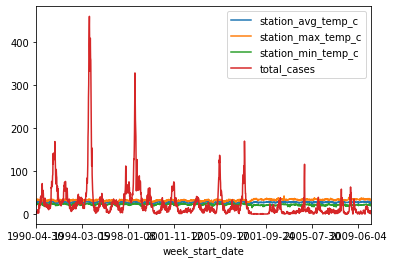

In [68]:
df.plot()

In [78]:
# Splitting the data between cities
df_sj = df[df.city=='sj']
df_iq = df[df.city=='iq']

In [83]:
df_iq.head()

,city,station_avg_temp_c,station_max_temp_c,station_min_temp_c,total_cases
week_start_date,,,,,
2000-07-01,iq,26.400000,32.5,20.7,0
2000-07-08,iq,26.900000,34.0,20.8,0
2000-07-15,iq,26.800000,33.0,20.7,0
2000-07-22,iq,25.766667,31.5,14.7,0
2000-07-29,iq,26.600000,33.3,19.1,0


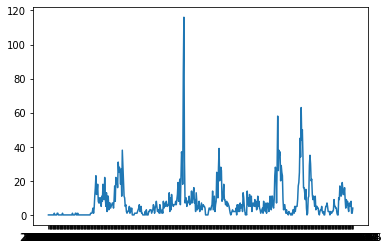

In [92]:
plt.plot(df_iq['total_cases'])
plt.show()

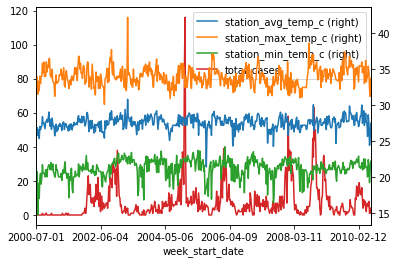

In [86]:
df_iq.plot(secondary_y=['station_avg_temp_c','station_max_temp_c','station_min_temp_c'])

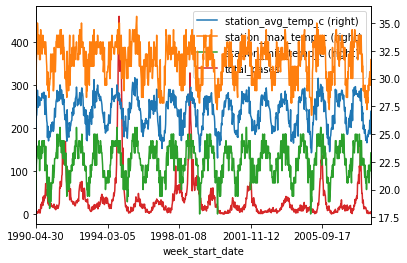

In [87]:
df_sj.plot(secondary_y=['station_avg_temp_c','station_max_temp_c','station_min_temp_c'])